# Analyse COVID-19

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

## Fetching calculated data

In [26]:
df_dataset = pd.read_csv('dataset.csv', index_col=0)

In [27]:
df_dataset

,country,date,case,death,population,density,size,ratio,ratio_death,start_date,start_death_date,age,age_death
126.0,Algeria,2020-01-22,0.0,0.0,43851.043,18.411348,2381740.0,0.000000,0.000000,2020-03-23,2020-03-20,-61.0,-58.0
127.0,Algeria,2020-01-23,0.0,0.0,43851.043,18.411348,2381740.0,0.000000,0.000000,2020-03-23,2020-03-20,-60.0,-57.0
128.0,Algeria,2020-01-24,0.0,0.0,43851.043,18.411348,2381740.0,0.000000,0.000000,2020-03-23,2020-03-20,-59.0,-56.0
129.0,Algeria,2020-01-25,0.0,0.0,43851.043,18.411348,2381740.0,0.000000,0.000000,2020-03-23,2020-03-20,-58.0,-55.0
130.0,Algeria,2020-01-26,0.0,0.0,43851.043,18.411348,2381740.0,0.000000,0.000000,2020-03-23,2020-03-20,-57.0,-54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10329.0,United Kingdom,2020-03-22,5745.0,282.0,67886.004,280.601844,241930.0,8.462716,0.415402,2020-03-10,2020-03-14,12.0,8.0
10330.0,United Kingdom,2020-03-23,6726.0,336.0,67886.004,280.601844,241930.0,9.907786,0.494947,2020-03-10,2020-03-14,13.0,9.0
10331.0,United Kingdom,2020-03-24,8164.0,423.0,67886.004,280.601844,241930.0,12.026043,0.623103,2020-03-10,2020-03-14,14.0,10.0
NaN,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-22,NaN,NaN


## Filtering the countries

In [28]:
filtered_countries = ['China','US','France', 'Italy','Spain','Germany','South Korea', 'Japan', 'Netherlands']

In [29]:
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']

# Dynamics

In [30]:
df_dynamics = df_dataset[['country','ratio_death','age_death']]

In [31]:
df_dynamics_t = df_dynamics.pivot(index='age_death',columns='country',values='ratio_death')

In [32]:
df_dynamics_plot = df_dynamics_t.loc[range(-20,50),filtered_countries]

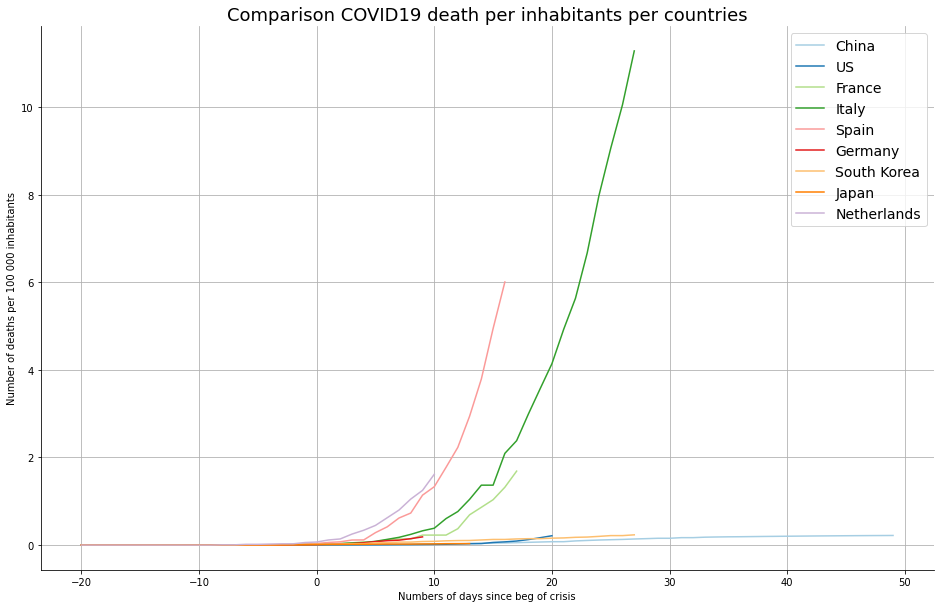

In [33]:
ax=df_dynamics_plot.plot(kind='line', figsize=(16,10), color=colors)
plt.title("Comparison COVID19 death per inhabitants per countries", fontsize=18)
plt.xlabel("Numbers of days since beg of crisis")
plt.ylabel("Number of deaths per 100 000 inhabitants")
plt.legend(fontsize=14)
plt.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("death_ratio.png")
plt.show() 

In [34]:
df_dynamics_vol = df_dataset[['country','death','age_death']]

In [35]:
df_dynamics_vol_t = df_dynamics_vol.pivot(index='age_death',columns='country',values='death')
df_dynamics_vol_plot = df_dynamics_vol_t.loc[range(-20,50),filtered_countries]

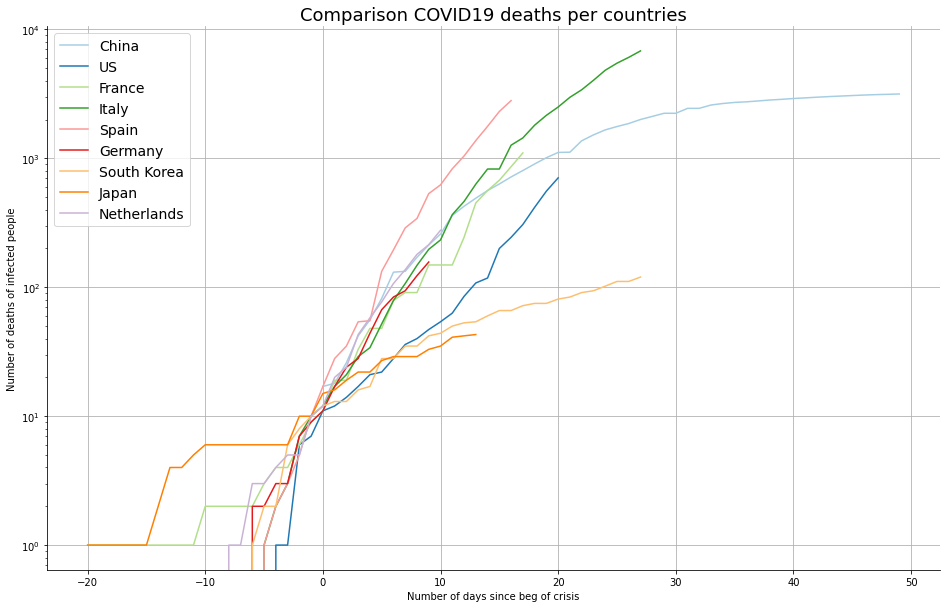

In [36]:
ax_vol=df_dynamics_vol_plot.plot(kind='line', figsize=(16,10), color= colors)
plt.title("Comparison COVID19 deaths per countries", fontsize=18)
plt.xlabel("Number of days since beg of crisis")
plt.ylabel("Number of deaths of infected people")
plt.legend(fontsize=14)
plt.grid()
ax_vol.spines['top'].set_visible(False)
ax_vol.spines['right'].set_visible(False)
ax_vol.set_yscale('log')
plt.savefig("death.png")
plt.show() 

### Derivates of ratio

In [37]:
df_dynamics_plot_deriv = df_dynamics_vol_plot.diff()

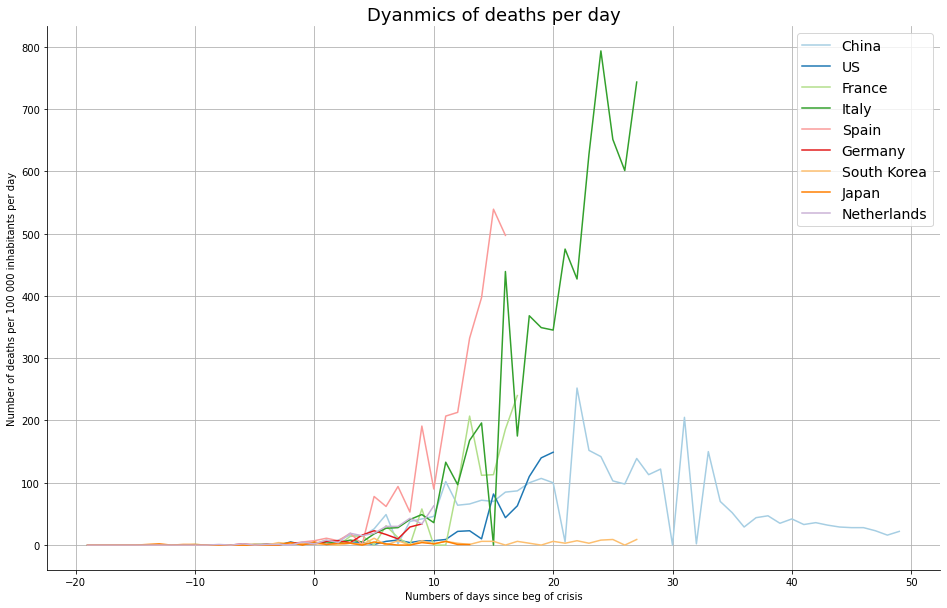

In [38]:
ax_deriv=df_dynamics_plot_deriv.plot(kind='line', figsize=(16,10), color=colors)
plt.title("Dyanmics of deaths per day", fontsize=18)
plt.xlabel("Numbers of days since beg of crisis")
plt.ylabel("Number of deaths per 100 000 inhabitants per day")
plt.legend(fontsize=14)
plt.grid()
ax_deriv.spines['top'].set_visible(False)
ax_deriv.spines['right'].set_visible(False)
plt.savefig("death_ratio_derivative.png")
plt.show() 

## Cases

In [39]:
df_dynamics_cases = df_dataset[['country','ratio','age']].pivot(index='age',columns='country',values='ratio')

In [40]:
df_dynamics_cases_plot = df_dynamics_cases.loc[range(-20,40),filtered_countries]

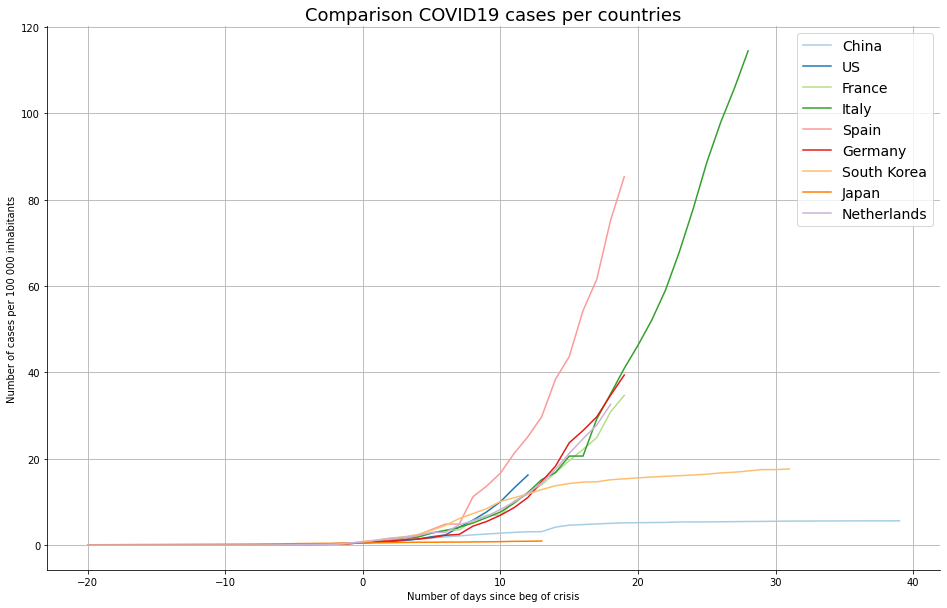

In [41]:
ax_cases=df_dynamics_cases_plot.plot(kind='line', figsize=(16,10), color=colors)
plt.title("Comparison COVID19 cases per countries", fontsize=18)
plt.xlabel("Number of days since beg of crisis")
plt.ylabel("Number of cases per 100 000 inhabitants")
plt.legend(fontsize=14)
plt.grid()
ax_cases.spines['top'].set_visible(False)
ax_cases.spines['right'].set_visible(False)
plt.savefig("cases.png")
plt.show() 

## Death rate
Should be stable

In [42]:
df_dataset['DR']=df_dataset['death']/df_dataset['case']

In [43]:
df_death_rate_pivot = df_dataset[['country','age_death', 'DR']].pivot(index='age_death',columns='country',values='DR').loc[range(0,50),filtered_countries]

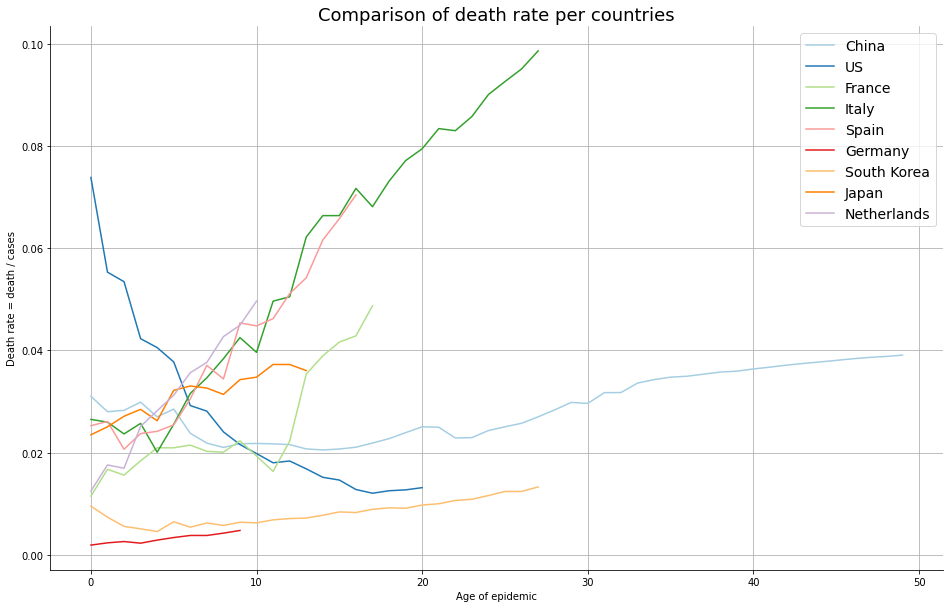

In [44]:
ax_vol=df_death_rate_pivot.plot(kind='line', figsize=(16,10), color= colors)
plt.title("Comparison of death rate per countries", fontsize=18)
plt.xlabel("Age of epidemic")
plt.ylabel("Death rate = death / cases")
plt.legend(fontsize=14)
plt.grid()
ax_vol.spines['top'].set_visible(False)
ax_vol.spines['right'].set_visible(False)
plt.savefig("death_rate.png")
plt.show() 

## Number of infected people in France

In [45]:
age_max_fr = df_dataset[df_dataset['country'] =='France']['age_death'].max()

In [46]:
df_dynamics_plot2 = df_dynamics_t.loc[range(-5,50),['France','Italy','Spain','United Kingdom','Netherlands']]

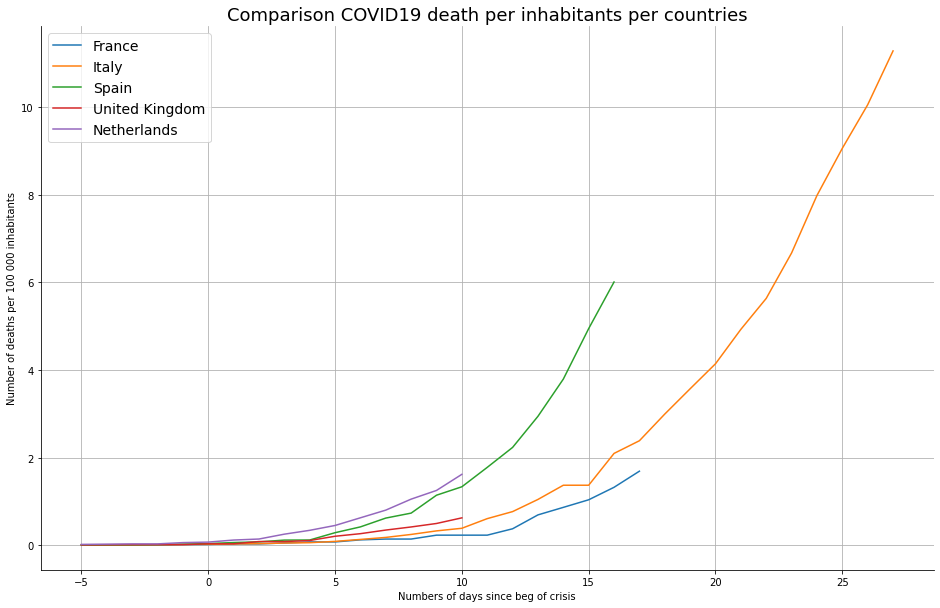

In [47]:
ax2=df_dynamics_plot2.plot(kind='line', figsize=(16,10))
plt.title("Comparison COVID19 death per inhabitants per countries", fontsize=18)
plt.xlabel("Numbers of days since beg of crisis")
plt.ylabel("Number of deaths per 100 000 inhabitants")
plt.legend(fontsize=14)
plt.grid()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.savefig("death_ratio.png")
plt.show() 